#Solving a Problem with Multi-Class Classification (Image Problem)
📝 **Note:** Since I want to share this example with a wider audience or for a job opportunity, I will start by explaining the idea behind the example more clearly.

**Explanation:**
Let’s pretend we are a fashion company, and we want to build a neural network to classify items of clothing. (I have already created a binary classification example, so now let’s increase the difficulty with a multi-class classification problem.)


## Get the data

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist # importing around 6000 data values

#Data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Visualize data to understand what is going on

In [2]:
# Visualize data we got
# First training example
print(f"First data -> \n")
print(f"Training sample: (x axis) \n{train_data[0]} \n")
print(f"Training Label: (y axis) {test_labels[0]}")

First data -> 

Training sample: (x axis) 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0

In [3]:
#Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

((28, 28), ()) -> So is tensor of 28 x 28 and the train labels is just a scalar (no shape basically)



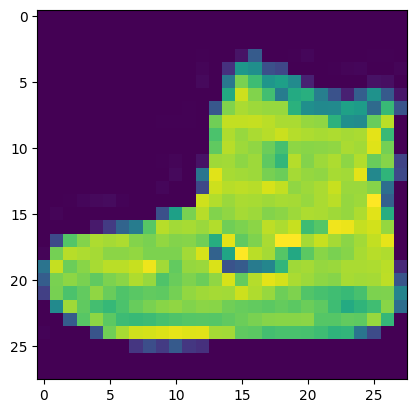

In [4]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]) #imshow because we are working with images

# According with the documentation we should see an Ankle boot (pixels of course)👢

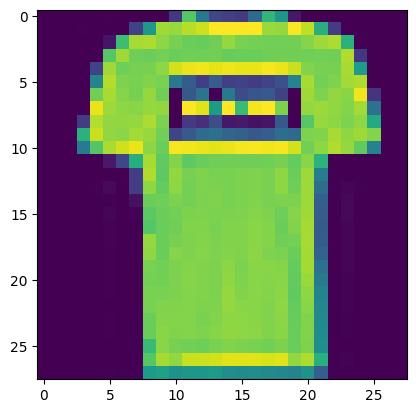

In [5]:
# Just to confirm, get another row

plt.imshow(train_data[1])
# It looks like a T-shirt, cool!

### Human Readable
The data is already set into numbers however is hard to understand the labels so it is probably good to translate for human perspective

In [6]:
# Create a small list to index our training labels for easy reading.
# Getting the official labels from documentation...
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names) # How many?

10

Text(0.5, 1.0, 'Bag')

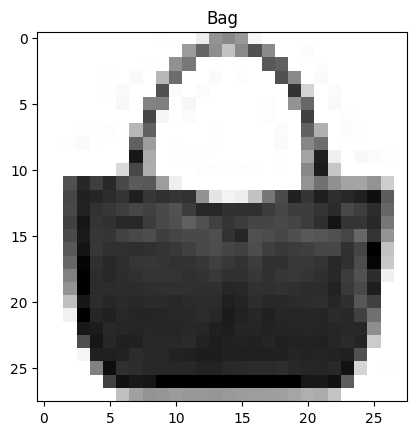

In [7]:
# Plot an example image and its label
index_of_choice = 100 # to change the item fast
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary) #Gray scale (binary)
plt.title(class_names[train_labels[index_of_choice]])


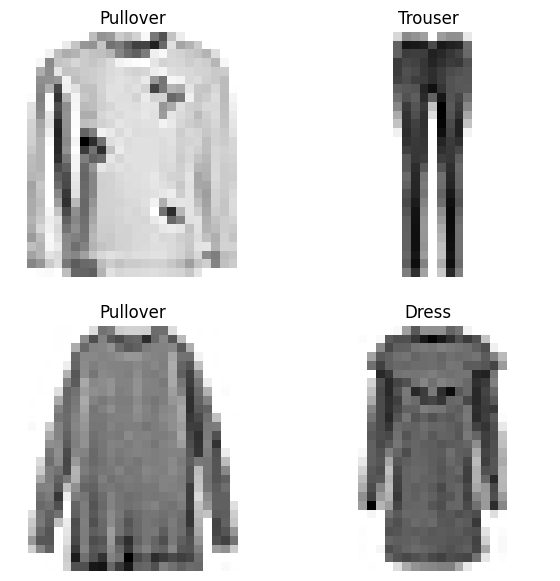

In [8]:
# Plot multiple random images of fashion MNIST

import random
plt.figure(figsize=(7,7)) #Image size

for i in range(4): # Loop 4 times
  ax = plt.subplot(2,2, i+1) # Creates a grid of 2 columns and 2 rows
  random_index = random.choice(range(len(train_data))) # Pick random values
  plt.imshow(train_data[random_index], cmap=plt.cm.binary) # Turn into Black and white
  plt.title(class_names[train_labels[random_index]]) # Get the name of the image
  plt.axis("off") # Turn off axis

## Building a multi-class classification model

* Input shape = 28 x 28 (The shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.lossess.CategoricalCrossentropy() or loss=tf.keras.losses.SparseCategoricalCrossentropy()
* Output layer activation = Softmax

In [9]:
# Remainder, how many input shape
train_data[0].shape

(28, 28)

In [10]:
# Remainder, how many output shape
len(class_names)

10

In [11]:
# Set random seed
tf.random.set_seed(42)

In [12]:
# Create test model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Input shape
    tf.keras.layers.Dense(4, activation="relu"), # Hidden layers
    tf.keras.layers.Dense(4, activation="relu"), # Hidden layers
    tf.keras.layers.Dense(10, activation="softmax") # Output shape
])

# Compile model
model_1.compile(
   # loss=tf.keras.losses.CategoricalCrossentropy(), # for one_hot categories
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

#fit model
non_norm_history_1 = model_1.fit(
    train_data,
    train_labels,
    epochs=10,
    validation_data=(test_data, test_labels)
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0995 - loss: 3.2735 - val_accuracy: 0.1000 - val_loss: 2.3030
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0985 - loss: 2.3028 

In [13]:
# for curiosity, I will try one_hot to my labels
tf.one_hot(train_labels[:10], depth=10) # It works!

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [14]:
# Create a second model for one_hot
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Input shape
    tf.keras.layers.Dense(4, activation="relu"), # Hidden layers
    tf.keras.layers.Dense(4, activation="relu"), # Hidden layers
    tf.keras.layers.Dense(10, activation="softmax") # Output shape
])

# Compile model
model_2.compile(
   loss=tf.keras.losses.CategoricalCrossentropy(), # for one_hot categories
   # loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

#fit model
non_norm_history_2 = model_2.fit(
    train_data,
    tf.one_hot(train_labels, depth=10),
    epochs=10,
    validation_data=(test_data,
                     tf.one_hot(test_labels, depth=10))
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0989 - loss: 2.6280 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 -

In [15]:
#Check results!
# Comparing both models
model_1.evaluate(test_data, test_labels), model_2.evaluate(test_data, tf.one_hot(test_labels, depth=10))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0978 - loss: 2.3027
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0978 - loss: 2.3027


([2.3026537895202637, 0.10000000149011612],
 [2.3026537895202637, 0.10000000149011612])

In [16]:
#It looks model_2 is better...
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

## Scale features (Normalization)


In [17]:
train_data.min(), train_data.max()

(0, 255)

Normalization or Scaling is prefered by Neural Networks, this mean they like to have numbers between 0 and 1 but right now we have numbers between 0 and 255


In [18]:
# Get training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()  # 0.0 , 1.0 Awesome!

(0.0, 1.0)

In [19]:
# Create the model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model_3
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model_3
norm_history = model_3.fit(
    train_data_norm,
    train_labels,
    epochs=10,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3710 - loss: 1.6098 - val_accuracy: 0.5887 - val_loss: 0.9608
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6230 - loss: 0.9077 - val_accuracy: 0.7284 - val_loss: 0.7649
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7455 - loss: 0.7176 - val_accuracy: 0.7564 - val_loss: 0.6700
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7696 - loss: 0.6446 - val_accuracy: 0.7655 - val_loss: 0.6419
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7779 - loss: 0.6177 - val_accuracy: 0.7707 - val_loss: 0.6287
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7822 - loss: 0.6021 - val_accuracy: 0.7738 - val_loss: 0.6201
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7849 - loss: 0.5911 - val_accuracy: 0.7745 - val_loss: 0.6144
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7869 - loss: 0.5826 - 

🔑 **Note:** Neural Networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

In [20]:
#Check results!
# Comparing models
model_1.evaluate(test_data, test_labels),
model_2.evaluate(test_data, tf.one_hot(test_labels, depth=10)),
model_3.evaluate(test_data_norm, test_labels) # Normalize one

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0978 - loss: 2.3027
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0978 - loss: 2.3027
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7825 - loss: 0.5909


[0.6029915809631348, 0.781499981880188]

In [21]:
# Time ago I created a super cool function to visualized and analize what's going on, let's use it here
# Is in Spanish but basically it draw a graph based on history data provided by the model

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

def visualize_training_history(history, save=False, save_path="training_metrics.png", ylim=None, font_size=12):
    """
    Visualiza las métricas de entrenamiento como tabla, gráficos separados y gráficos combinados.

    Args:
        history (tf.keras.callbacks.History): Objeto de historial de entrenamiento.
        save (bool, optional): Si True, guarda los gráficos. Por defecto es False.
        save_path (str, optional): Ruta donde se guardarán los gráficos. Solo se usa si save=True.
        ylim (tuple, optional): Límites del eje Y.
        font_size (int, optional): Tamaño de fuente para los gráficos.
    """
    # Configuración de fuente
    mpl.rcParams.update({'font.size': font_size})

    # Crear tabla con history.history
    history_df = pd.DataFrame(history.history)
    print("Tabla de métricas:")
    display(history_df)

    # Mostrar métricas finales
    final_metrics = history_df.iloc[-1]
    print("\nMétricas finales por época:")
    print(final_metrics.to_string())

    # Graficar métricas individuales
    metrics = [col for col in history_df.columns if not col.startswith("val_")]
    colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

    plt.figure(figsize=(12, len(metrics) * 4))

    for i, metric in enumerate(metrics, start=1):
        plt.subplot(len(metrics), 1, i)
        plt.plot(history_df[metric], label=f"Entrenamiento {metric}", color=colors[i % len(colors)])

        val_metric = f"val_{metric}"
        if val_metric in history_df.columns:
            plt.plot(history_df[val_metric], label=f"Validación {metric}", linestyle="--", color=colors[i % len(colors)])

        plt.title(metric.capitalize())
        plt.xlabel("Épocas")
        plt.ylabel(metric.capitalize())
        if ylim:
            plt.ylim(ylim)
        plt.legend()

    plt.tight_layout()
    plt.show()

    # Graficar todas las métricas juntas
    plt.figure(figsize=(12, 6))
    history_df.plot(ax=plt.gca())
    plt.title("Training and Validation Metrics Combined")
    plt.xlabel("Épocas")
    plt.ylabel("Valores de Métrica")
    plt.legend(loc="upper right")
    if ylim:
        plt.ylim(ylim)
    plt.show()

    # Guardar gráficos si se solicita
    if save:
        plt.savefig(save_path, dpi=300)
        print(f"Gráficos guardados en: {save_path}")

Tabla de métricas:


,accuracy,loss,val_accuracy,val_loss
0,0.098250,2.347373,0.1,2.302652
1,0.097417,2.302777,0.1,2.302654
2,0.097300,2.302777,0.1,2.302654
3,0.097300,2.302777,0.1,2.302654
4,0.097300,2.302777,0.1,2.302654
5,0.097300,2.302776,0.1,2.302654
6,0.097300,2.302777,0.1,2.302654
7,0.097300,2.302777,0.1,2.302654
8,0.097300,2.302777,0.1,2.302654
9,0.097300,2.302777,0.1,2.302654



Métricas finales por época:
accuracy        0.097300
loss            2.302777
val_accuracy    0.100000
val_loss        2.302654


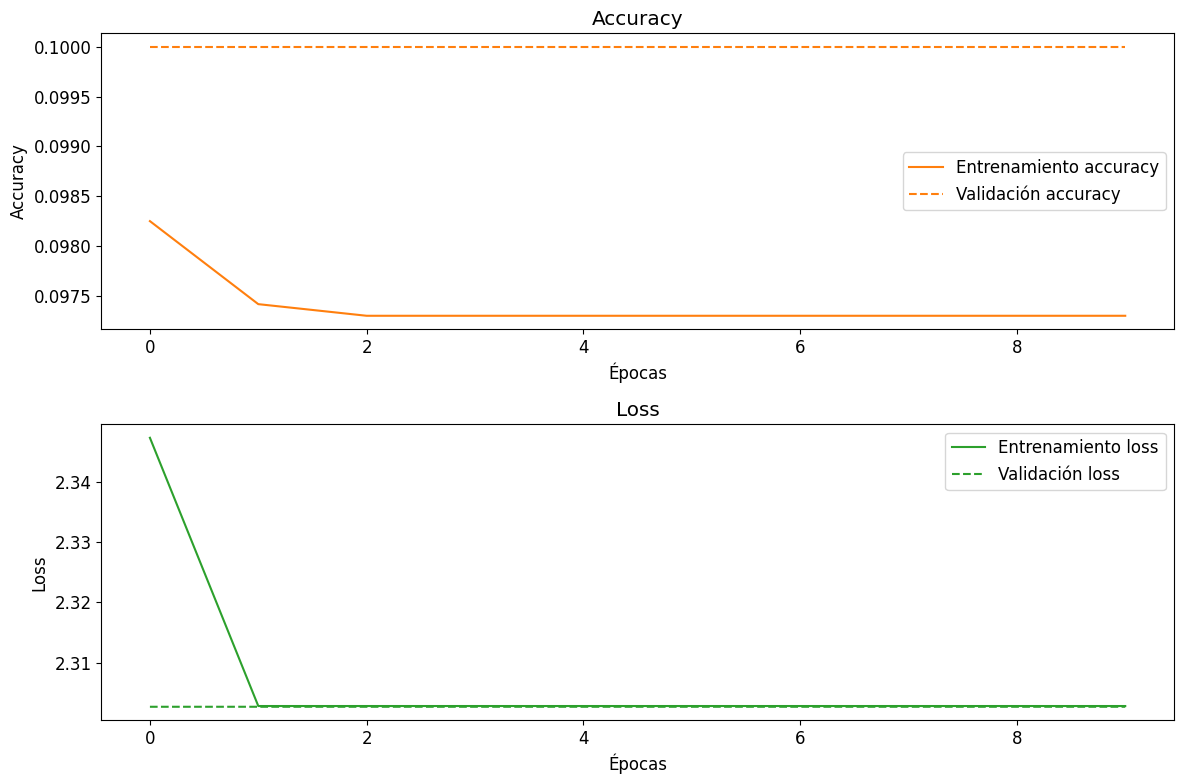

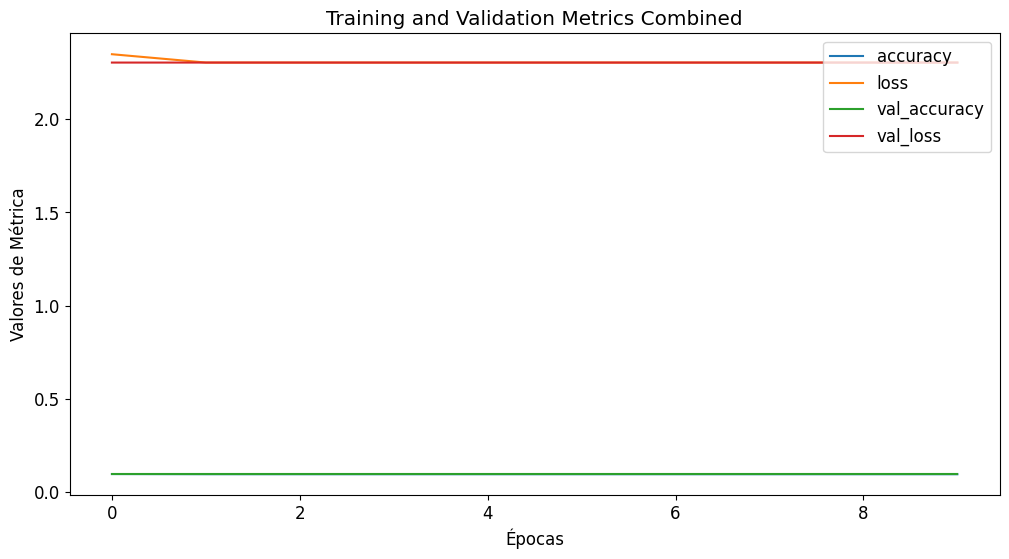

In [22]:
# Non-Normalize Data
visualize_training_history(non_norm_history_2, False)

Tabla de métricas:


,accuracy,loss,val_accuracy,val_loss
0,0.486217,1.283886,0.5887,0.960850
1,0.652367,0.853540,0.7284,0.764936
2,0.752833,0.686417,0.7564,0.670047
3,0.770783,0.630619,0.7655,0.641861
4,0.778283,0.607396,0.7707,0.628742
5,0.782367,0.593352,0.7738,0.620119
6,0.785550,0.583342,0.7745,0.614427
7,0.787817,0.575597,0.7769,0.609878
8,0.789467,0.569900,0.7797,0.605706
9,0.791617,0.565105,0.7815,0.602992



Métricas finales por época:
accuracy        0.791617
loss            0.565105
val_accuracy    0.781500
val_loss        0.602992


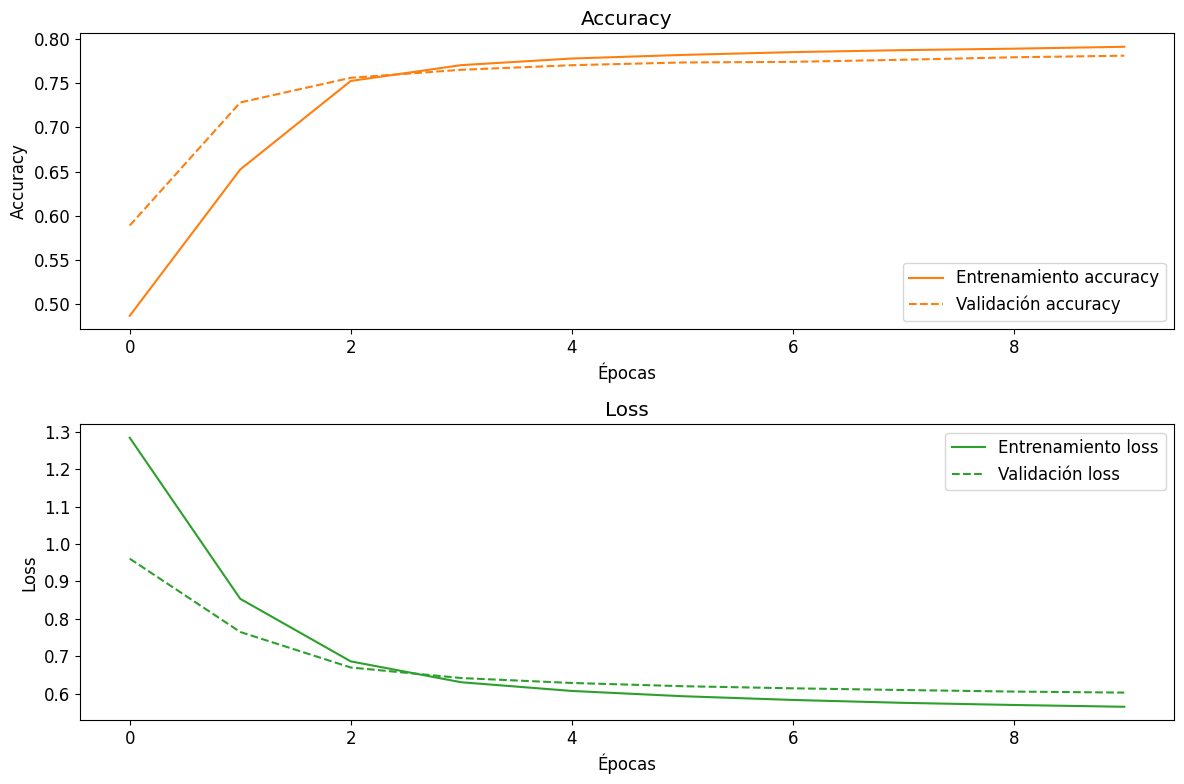

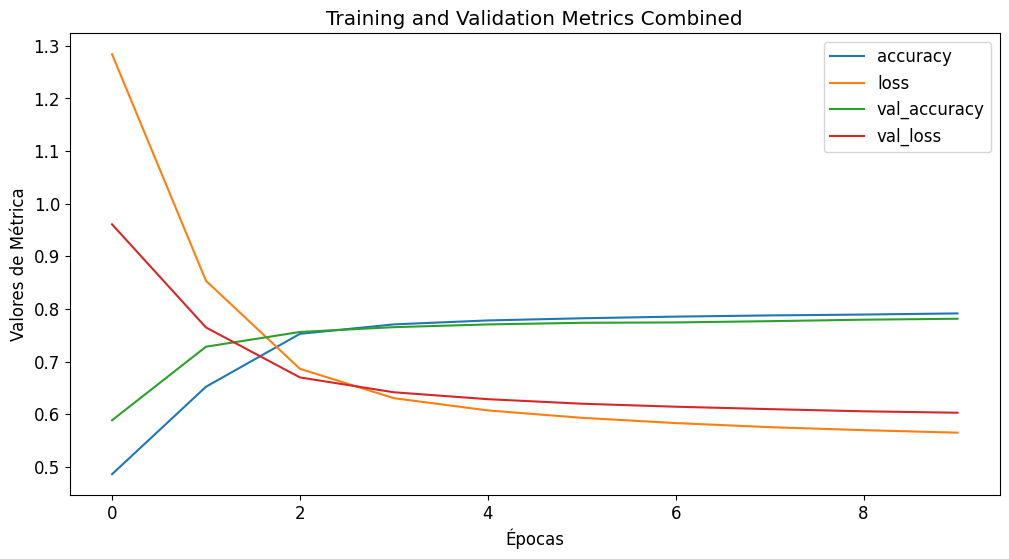

In [23]:
# Normalize model
visualize_training_history(norm_history, False)

**Note: ** Same model but non-normalize and normalize, this is a great example of how much *damatically* it can improve it.
**Important: ** In order to compare models we need to use same critirea (e.g. same architecture but different data or same data but different architecture) change things one by one and **visualize** the results

## Finding the ideal learning rate

In [24]:
# Create model_4 and add a callback to find the learning rate
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model_4
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Callback for the learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

# Fit the model_4
find_lr_history_model_4 = model_4.fit(
    train_data_norm,
    train_labels,
    epochs=40,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2391 - loss: 2.0544 - val_accuracy: 0.3851 - val_loss: 1.6576 - learning_rate: 1.0000e-04
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4153 - loss: 1.5252 - val_accuracy: 0.4267 - val_loss: 1.2775 - learning_rate: 1.1220e-04
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4551 - loss: 1.2187 - val_accuracy: 0.5313 - val_loss: 1.0961 - learning_rate: 1.2589e-04
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5931 - loss: 1.0204 - val_accuracy: 0.6550 - val_loss: 0.8966 - learning_rate: 1.4125e-04
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6717 - loss: 0.8585 - val_accuracy: 0.6940 - val_loss: 0.8112 - learning_rate: 1.5849e-04
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7048 - loss: 0.7848 - val_accuracy: 0.7220 - val_loss: 0.7587 - learning_rate: 1.7783e-04
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/s

In [35]:
# Another cool function a created to determinate and visualize a good learning rate...
import numpy as np
import matplotlib.pyplot as plt
def fun_plot_learning_rate(history, metric="loss", log_scale=True, ylim=None, save=False, save_path="lr_vs_loss.png", scheduler_type=None, base_lr=1e-4, max_lr=None, step_size=None, figsize=(14, 7)):
    """
    Visualiza la relación entre la tasa de aprendizaje y una métrica (por defecto, la pérdida),
    y ajusta automáticamente la longitud de las tasas de aprendizaje.

    Args:
        history (tf.keras.callbacks.History): Objeto de historial de entrenamiento.
        metric (str, optional): Métrica a graficar contra el learning rate. Por defecto es "loss".
        log_scale (bool, optional): Si True, usa escala logarítmica para el eje X. Por defecto es True.
        ylim (tuple, optional): Límites para el eje Y (métrica).
        save (bool, optional): Si True, guarda el gráfico como una imagen. Por defecto es False.
        save_path (str, optional): Ruta donde se guardará el gráfico si save=True. Por defecto es "lr_vs_loss.png".
        scheduler_type (str, optional): Tipo de scheduler a usar. Puede ser 'exponential_decay' o 'cyclic_lr'.
        base_lr (float, optional): Learning rate base para calcular la escala. Por defecto es 1e-4.
        max_lr (float, optional): El learning rate máximo para CyclicLR.
        step_size (int, optional): El paso para CyclicLR.
        figsize (tuple, optional): Tamaño del gráfico (ancho, alto). Por defecto es (14, 7).
    """
    # Verificar que la métrica existe en el historial
    if metric not in history.history:
        raise ValueError(f"La métrica '{metric}' no está en el historial. Métricas disponibles: {list(history.history.keys())}")

    # Extraer los valores de la métrica
    metric_values = history.history[metric]
    num_points = len(metric_values)

    # Calcular automáticamente las tasas de aprendizaje
    lrs = base_lr * (10 ** (tf.range(num_points) / 20))

    # Determinar el índice del mínimo valor de la métrica (punto ideal)
    min_loss_idx = np.argmin(metric_values)
    ideal_lr = lrs[min_loss_idx].numpy()  # Convertir a valor escalar
    ideal_loss = metric_values[min_loss_idx]

    # Configurar el gráfico
    plt.figure(figsize=figsize)  # Cambiar el tamaño del gráfico
    if log_scale:
        plt.semilogx(lrs, metric_values, label=f"Learning Rate vs. {metric.capitalize()}")
    else:
        plt.plot(lrs, metric_values, label=f"Learning Rate vs. {metric.capitalize()}")

    # Marcar el punto ideal con un marcador
    plt.scatter(ideal_lr, ideal_loss, color='red', marker='o', s=100, label=f"Punto Ideal (LR={ideal_lr:.5e}, Loss={ideal_loss:.5f})")

    # Etiquetas y título
    plt.xlabel("Learning Rate")
    plt.ylabel(metric.capitalize())
    plt.title(f"Learning Rate vs. {metric.capitalize()}")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()

    # Configurar límites del eje Y si se especifican
    if ylim:
        plt.ylim(ylim)

    # Mostrar o guardar el gráfico
    if save:
        plt.savefig(save_path, dpi=300)
        print(f"Gráfico guardado en: {save_path}")
    plt.show()

    # Mostrar el valor del learning rate en formato Adam(lr=valor)
    print(f"\nEl learning rate ideal es: Adam(learning_rate={ideal_lr:.5e})")

    # Si se quiere usar un scheduler
    if scheduler_type:
        if scheduler_type == 'exponential_decay':
            lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=ideal_lr,
                decay_steps=1000,
                decay_rate=0.9,
                staircase=True
            )
            print("\nUsando ExponentialDecay como scheduler.")
            return lr_schedule

        elif scheduler_type == 'cyclic_lr':
            if max_lr is None or step_size is None:
                raise ValueError("Para CyclicLR, max_lr y step_size son necesarios.")
            lr_schedule = CyclicLearningRate(ideal_lr, max_lr, step_size)
            print("\nUsando Cyclic Learning Rate como scheduler.")
            return lr_schedule

    # Devolver el learning rate ideal si no se especificó un scheduler
    return ideal_lr


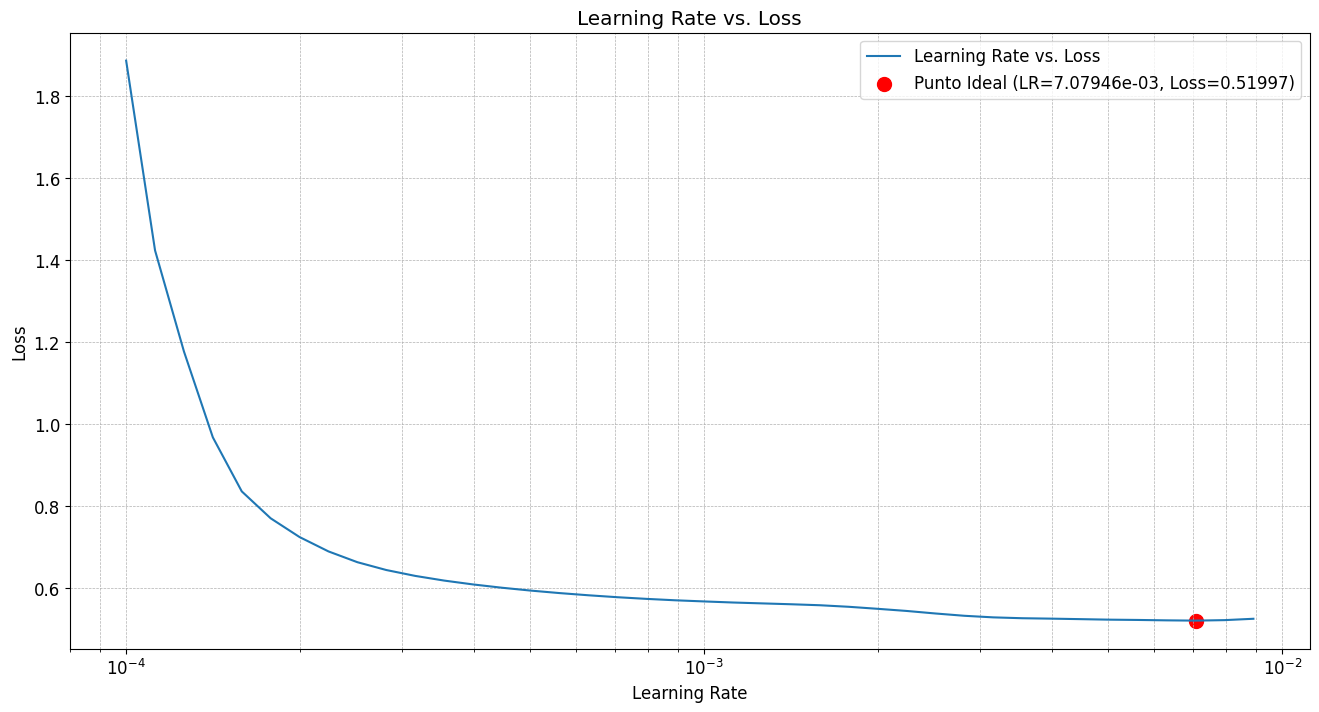


El learning rate ideal es: Adam(learning_rate=7.07946e-03)


0.007079457843841381

In [36]:
fun_plot_learning_rate(find_lr_history_model_4, metric="loss", figsize=(16, 8))

In [31]:
# It looks like around 0.002 could be good for Adam 🤔 remember this is not 100% sure

# Create model_5
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model_5
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
                metrics=["accuracy"])

# Compile model_5
model_5_history = model_5.fit(
    train_data_norm,
    train_labels,
    epochs=20,
    validation_data=(test_data_norm, test_labels)
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5138 - loss: 1.3121 - val_accuracy: 0.7562 - val_loss: 0.6916
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7633 - loss: 0.6547 - val_accuracy: 0.7872 - val_loss: 0.6043
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7910 - loss: 0.5822 - val_accuracy: 0.8011 - val_loss: 0.5744
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8069 - loss: 0.5523 - val_accuracy: 0.8089 - val_loss: 0.5557
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8128 - loss: 0.5356 - val_accuracy: 0.8139 - val_loss: 0.5459
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8175 - loss: 0.5254 - val_accuracy: 0.8155 - val_loss: 0.5406
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8200 - loss: 0.5182 - val_accuracy: 0.8171 - val_loss: 0.5365
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8223 - loss: 0.5129 - 

## Evaluating Multi-Class Classification Model
Some ideas...
* Using other classification metrics
* Assess some of its predictions (through visualizations)
* Improve its results (by trainging it for longer or changing the architecture)
* Save and Export to use in an application

In [37]:
# Make some predictions
y_probs = model_5.predict(test_data)
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 5.1809615e-19, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [38]:
# Remember to make predictions on the same kind  of data your model was trained on
# I spend about 20 minutes because to that simple error... 😜
test_data[0], test_data_norm[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0

In [39]:
# Make some predictions
y_probs = model_5.predict(test_data_norm)
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.18068522e-06, 8.74263009e-08, 8.16034808e-05, 4.98712360e-08,
        9.67651358e-05, 7.63681978e-02, 1.38052550e-04, 7.06505924e-02,
        7.28607178e-03, 8.45377326e-01],
       [2.93030549e-04, 5.40687893e-07, 9.07927394e-01, 7.09582082e-08,
        1.62819903e-02, 7.21871880e-31, 7.54935071e-02, 2.15110752e-26,
        3.50638061e-06, 2.70691728e-19],
       [1.59333553e-07, 9.99752522e-01, 1.23468140e-04, 7.39832030e-05,
        4.97667934e-05, 1.29030306e-27, 1.28506770e-07, 3.17986227e-15,
        1.28821395e-14, 6.13390594e-30],
       [2.54420740e-07, 9.99718785e-01, 1.29087653e-04, 1.07885062e-04,
        4.38658644e-05, 1.62628818e-27, 1.56712829e-07, 1.78350410e-15,
        1.43128883e-14, 7.67878049e-30],
       [9.60326269e-02, 2.13364328e-04, 2.35343531e-01, 1.50362523e-02,
        4.74096239e-02, 2.00791923e-17, 6.04497075e-01, 1.42650609e-20,
        1.46754726e-03, 1.33922708e-17]], dtype=float32)

In [40]:
# Create a confusion matrix as def for using in other projects
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def fun_plot_confusion_matrix(y_true, y_pred, classes=None, normalize=True, cmap="Blues", figsize=(10, 10), title="Confusion Matrix", text_size=15, save=False, save_path="confusion_matrix.png"):
    """
    Dibuja una matriz de confusión con opciones para personalizar el diseño.
    """
    # Alinear formatos de y_true y y_pred
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:  # Si y_pred es multietiqueta
        y_pred = np.argmax(y_pred, axis=1)
    if len(y_true.shape) > 1 and y_true.shape[1] > 1:  # Si y_true es multietiqueta
        y_true = np.argmax(y_true, axis=1)

    # Crear la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm_norm = cm.astype("float") / cm.sum(axis=1, keepdims=True)
    else:
        cm_norm = cm

    n_classes = cm.shape[0]  # Número de clases

    # Crear el gráfico
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.get_cmap(cmap))
    fig.colorbar(cax)

    # Etiquetas para los ejes
    if classes is None:
        classes = np.arange(n_classes)

    ax.set(title=title,
           xlabel="Predicted Label",
           ylabel="True Label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=classes,
           yticklabels=classes)

    # Poner etiquetas del eje x en la parte inferior
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Ajustar tamaño del texto
    ax.title.set_size(20)
    ax.xaxis.label.set_size(15)
    ax.yaxis.label.set_size(15)
    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12)

    # Umbral para el color del texto
    threshold = (cm.max() + cm.min()) / 2.

    # Mostrar texto en las celdas
    for i, j in itertools.product(range(n_classes), range(n_classes)):
        value = f"{cm[i, j]}"  # Valores absolutos
        if normalize:
            value += f" ({cm_norm[i, j] * 100:.1f}%)"  # Agregar valores normalizados
        ax.text(j, i, value,
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)

    # Ajustar el diseño
    plt.tight_layout()

    # Guardar la figura si se especifica
    if save:
        plt.savefig(save_path, dpi=300)
        print(f"Matriz de confusión guardada en: {save_path}")

    plt.show()


In [41]:
# Conver model prediction into same labels
y_preds = y_probs.argmax(axis=1)
y_preds[:5]

array([9, 2, 1, 1, 6])

In [42]:
l, a = model_5.evaluate(test_data_norm, test_labels)
print(f"Accuracy: {a*100:.2f}%")
print(f"Loss: {l:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8247 - loss: 0.5192
Accuracy: 81.94%
Loss: 0.53


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[740,   6,  28,  80,   4,   9, 120,   0,  13,   0],
       [  1, 950,  15,  29,   2,   0,   2,   0,   1,   0],
       [ 19,   7, 732,  10, 136,   1,  93,   0,   2,   0],
       [ 35,  22,  14, 814,  44,   8,  55,   0,   6,   2],
       [  1,   2, 145,  24, 741,   0,  81,   0,   6,   0],
       [  1,   0,   0,   0,   0, 914,   0,  38,   6,  41],
       [136,   4, 143,  44, 114,   2, 538,   0,  18,   1],
       [  0,   0,   0,   0,   0,  49,   0, 898,   1,  52],
       [  2,   1,   6,  10,   7,  14,  31,   3, 921,   5],
       [  1,   0,   0,   0,   0,  17,   0,  35,   1, 946]])

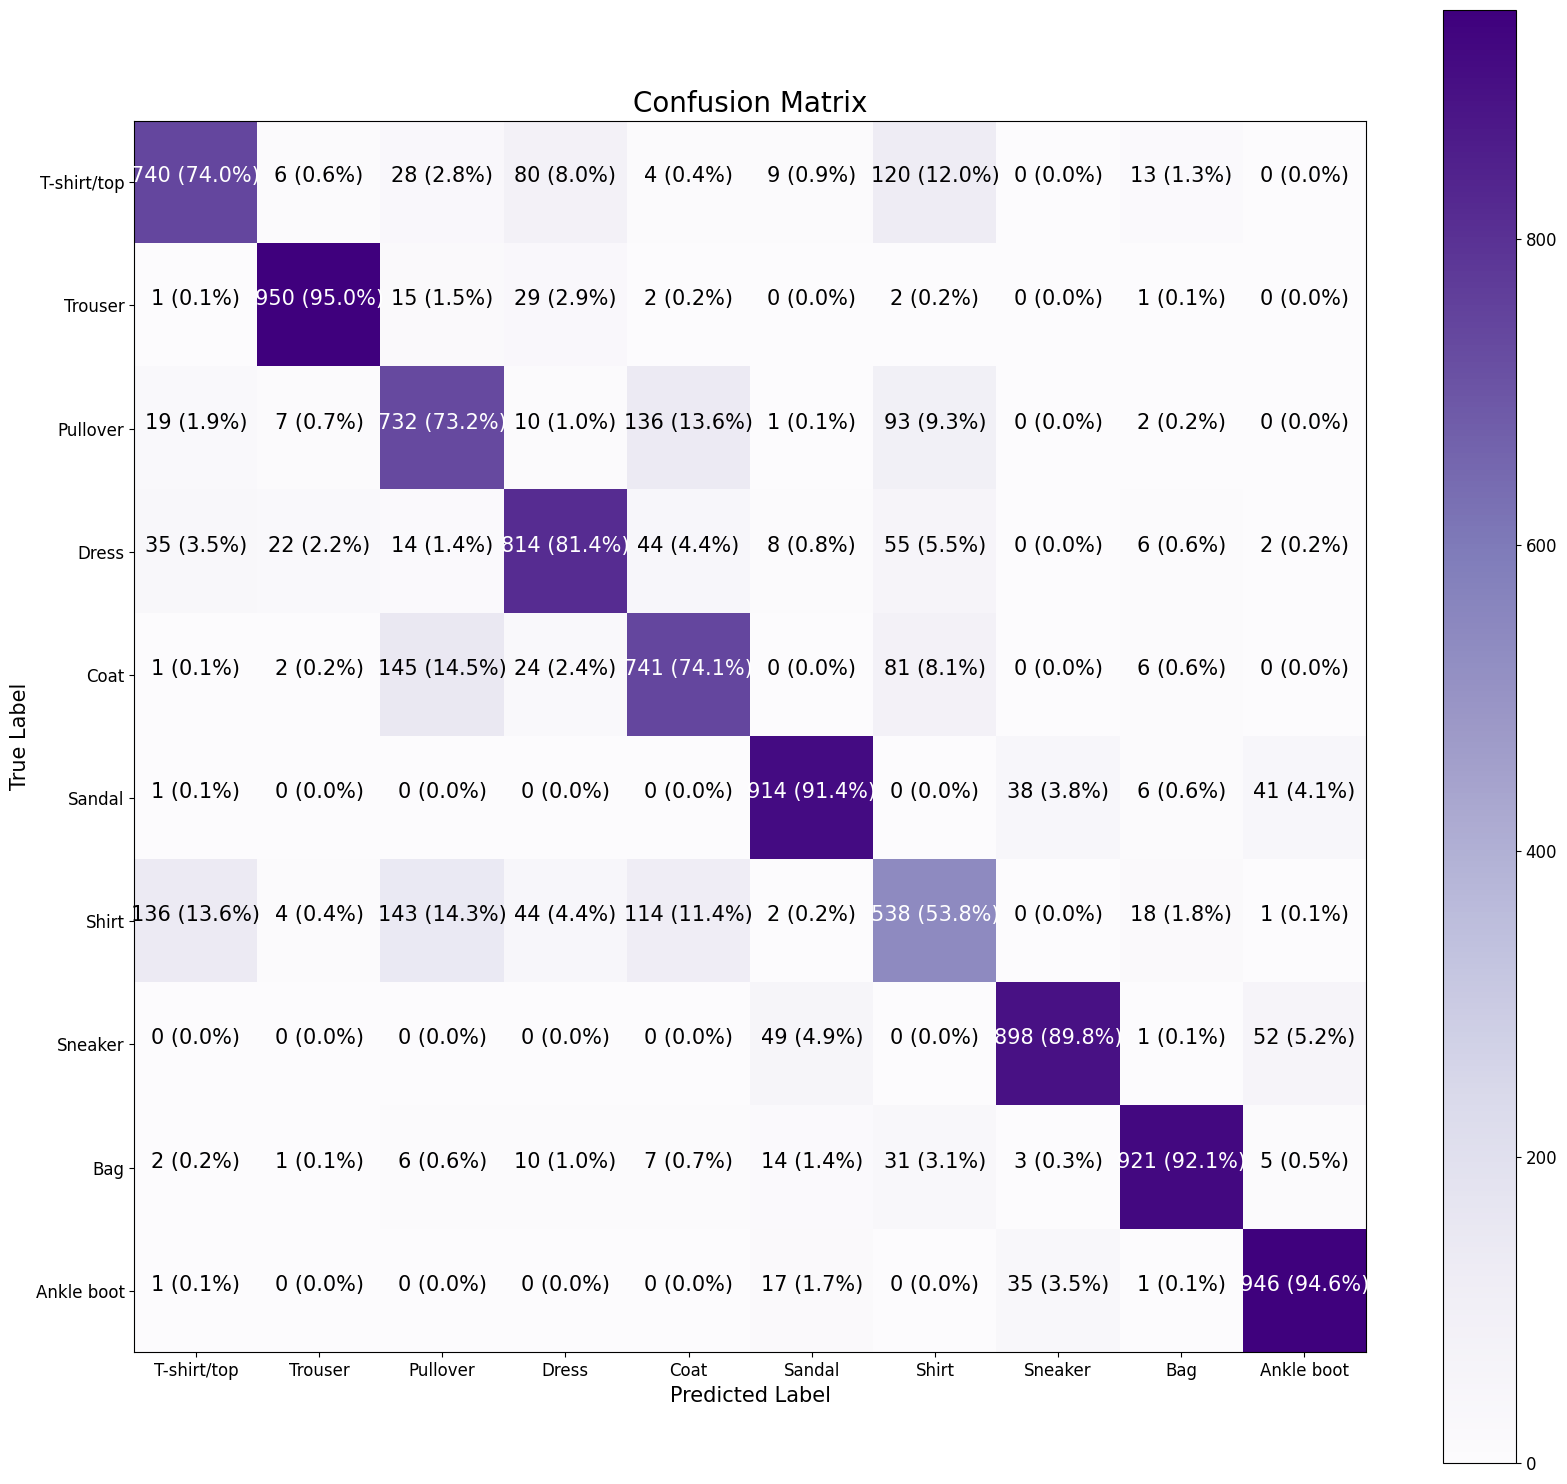

In [44]:
fun_plot_confusion_matrix(test_labels, y_probs,
                      normalize=True,
                      cmap="Purples",
                      classes=class_names,
                      figsize=(17, 15),
                      save=False,
                      save_path="confusion_matrix_example.png")

# **Analysis**

With the Confusion Matrix Graph, we can see which parts of the model are making more mistakes or causing confusion (hence the name). If squares other than the diagonal are highlighted, it means those areas are problematic. In this example, some of these mistakes are understandable, such as confusing Pullover, Dress, and Coat with Shirt (from the true label) or Shirt (from the y-axis) with T-Shirt (from the x-axis). Even I would have trouble telling the difference!

### Possible Solutions:
If the items are very similar, could we group them into one category?
Alternatively, can we provide the model with more examples to improve its ability to recognize and distinguish these items?

### Current Results:
* Accuracy: 82.41%
* Loss: 0.52

These results show we’re making good progress!
Machine learning is about investigation, exploration, and testing—so let’s keep improving and experimenting.





I want to create a another function to visualize the followings...
* Plot a Random Image
* Make a prediction on said image
* Label the plot with the truth label & the prediected label

## Analysing the layers of the current model (model_5)

In [121]:
model_5.layers

[<Flatten name=flatten_4, built=True>,
 <Dense name=dense_12, built=True>,
 <Dense name=dense_13, built=True>,
 <Dense name=dense_14, built=True>]

In [123]:
# Extract a particula layer
model_5.layers[1]


<Dense name=dense_12, built=True>

In [124]:
# Get the patterns of a SINGLE layer in our network
weighs, biases = model_5.layers[1].get_weights()

# Shapes
weighs, weighs.shape # this are the patters that the network have been learning

(array([[ 1.4052051 , -0.27087998, -1.0658556 ,  1.0664092 ],
        [-1.8005953 ,  1.0528364 , -0.36515805, -0.843383  ],
        [ 1.29307   ,  0.9606019 , -2.3041828 , -1.2213835 ],
        ...,
        [-0.07691312,  0.8865065 , -0.23587279, -1.3351549 ],
        [-0.0854193 ,  1.4297802 , -0.2957537 ,  0.23129202],
        [ 1.7725173 ,  0.03633388, -0.7713008 ,  0.9111079 ]],
       dtype=float32),
 (784, 4))

In [126]:
# Bias and biases shapes
biases, biases.shape

(array([-0.204104  , -0.44807374,  1.2711816 ,  0.19867171], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix
The bias vector get initialized as zeros (at least in the case of Tensor Flow Dense layer)

The bias vector dictates how much the patterns within the  the corresponding weights matrix should influence the next layer.

In [125]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

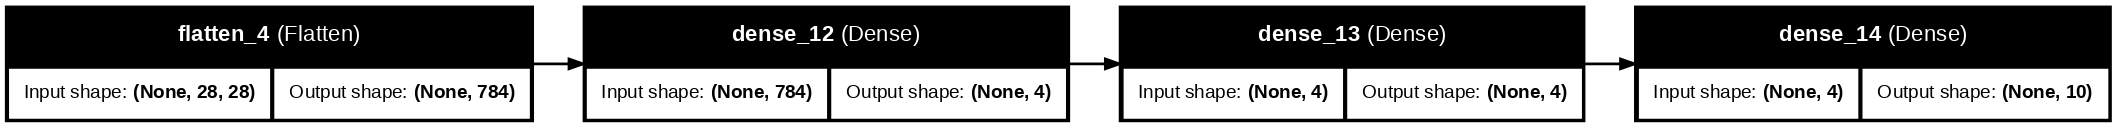

In [141]:
from tensorflow.keras.utils import plot_model

# Visualizing the model with more details
plot_model(
    model_5,
    show_shapes=True,              # Display the shape of the input and output for each layer
    show_layer_names=True,         # Display the name of each layer
    rankdir='LR',                  # Change the orientation to left-to-right (better for large models)
    to_file='model_architecture.png',  # Save the diagram as a PNG file
    expand_nested=True,            # Expand nested models if any exist (useful for functional models)
    dpi=100                        # Set the DPI for high-quality image generation
)

In [135]:
from tensorflow.keras.callbacks import TensorBoard

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='logs', histogram_freq=1)

# Train the model with the TensorBoard callback
model_5.fit(test_data_norm, test_labels, epochs=10, callbacks=[tensorboard_callback])


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8208 - loss: 0.5144
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8235 - loss: 0.5089
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8251 - loss: 0.5042
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8274 - loss: 0.5000
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8294 - loss: 0.4966
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8302 - loss: 0.4930
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8299 - loss: 0.4898
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8293 - loss: 0.4866
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8292 - loss: 0.4837
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8307 - loss: 0.4809


In [138]:
!tensorboard --logdir=logs --host localhost --port 8088

2025-01-08 06:32:57.368386: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-08 06:32:57.396915: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-08 06:32:57.405050: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-08 06:32:58.874766: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

TensorBoard 2.17.1 at http://localhost:8088/ (P

In [90]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

def plot_random_image(
    model,
    images,
    true_labels,
    classes,
    input_shape=(28, 28, 1),  # Expected shape of the input
    batch_size=1,  # Number of random images to display
    title_size=16,
    cmap="binary",
    save_images=False,  # Whether to save the images
    save_dir="output_images",  # Directory to save images
    show_probabilities=True  # Whether to show class probabilities for each image
):
    """
    Selects random images or a batch of images from the dataset, predicts their labels using the model,
    and visualizes them with the true labels and predicted labels. Optionally saves the images and displays
    class probabilities.

    Args:
        model (tf.keras.Model): Trained model for making predictions.
        images (np.ndarray): Array of images to pick from.
        true_labels (np.ndarray): Array of true labels corresponding to the images.
        classes (list): List of class names corresponding to label indices.
        input_shape (tuple, optional): Expected shape of the input images. Default is (28, 28, 1).
        batch_size (int, optional): Number of random images to display. Default is 1.
        title_size (int, optional): Font size of the title. Default is 16.
        cmap (str, optional): Colormap for the images. Default is "binary".
        save_images (bool, optional): If True, saves the visualized images. Default is False.
        save_dir (str, optional): Directory to save images if save_images=True. Default is "output_images".
        show_probabilities (bool, optional): If True, shows the probability distribution for each image. Default is True.
    """
    # Validate inputs
    if len(images) != len(true_labels):
        raise ValueError("The number of images and true labels must be the same.")
    if images[0].shape[:2] != input_shape[:2]:
        raise ValueError(
            f"Images must have shape {input_shape[:2]}, but got {images[0].shape[:2]}"
        )
    if batch_size < 1:
        raise ValueError("Batch size must be at least 1.")

    # Ensure the save directory exists if save_images is True
    if save_images and not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Select random indices
    random_indices = random.sample(range(len(images)), batch_size)

    # Set up the figure dimensions (one row per batch item, two columns: image + probabilities)
    fig, axes = plt.subplots(batch_size, 2, figsize=(12, batch_size * 6))
    if batch_size == 1:
        axes = [axes]  # Make axes iterable for single batch case

    for idx, i in enumerate(random_indices):
        # Retrieve the target image and true label
        target_image = images[i]
        true_label = int(true_labels[i])

        # Prepare the image for prediction (add batch dimension if necessary)
        target_image_input = target_image[np.newaxis, ...]

        # Predict probabilities
        pred_probs = model.predict(target_image_input, verbose=0)
        pred_label_idx = np.argmax(pred_probs)
        pred_label = classes[pred_label_idx]
        pred_confidence = pred_probs[0][pred_label_idx] * 100

        # Determine title color
        color = "green" if pred_label_idx == true_label else "red"

        # Plot the image on the left
        axes[idx][0].imshow(target_image, cmap=cmap)
        axes[idx][0].axis(False)
        axes[idx][0].set_title(
            f"Pred: {pred_label} ({pred_confidence:.2f}%)\nTrue: {classes[true_label]}",
            fontsize=title_size,
            color=color,
        )

        # Plot the probabilities on the right
        if show_probabilities:
            axes[idx][1].bar(classes, pred_probs[0], color="blue")
            axes[idx][1].set_ylim(0, 1)  # Probabilities are between 0 and 1
            axes[idx][1].set_title("Class Probabilities", fontsize=title_size)
            axes[idx][1].set_ylabel("Probability")
            axes[idx][1].tick_params(axis='x', rotation=45)
        else:
            axes[idx][1].axis(False)  # If probabilities are not shown, hide the subplot

        # Save each image if save_images is True
        if save_images:
            save_path = os.path.join(save_dir, f"image_{i}_pred_{pred_label}.png")
            plt.savefig(save_path, dpi=300)
            print(f"Saved image {i} to {save_path}")

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


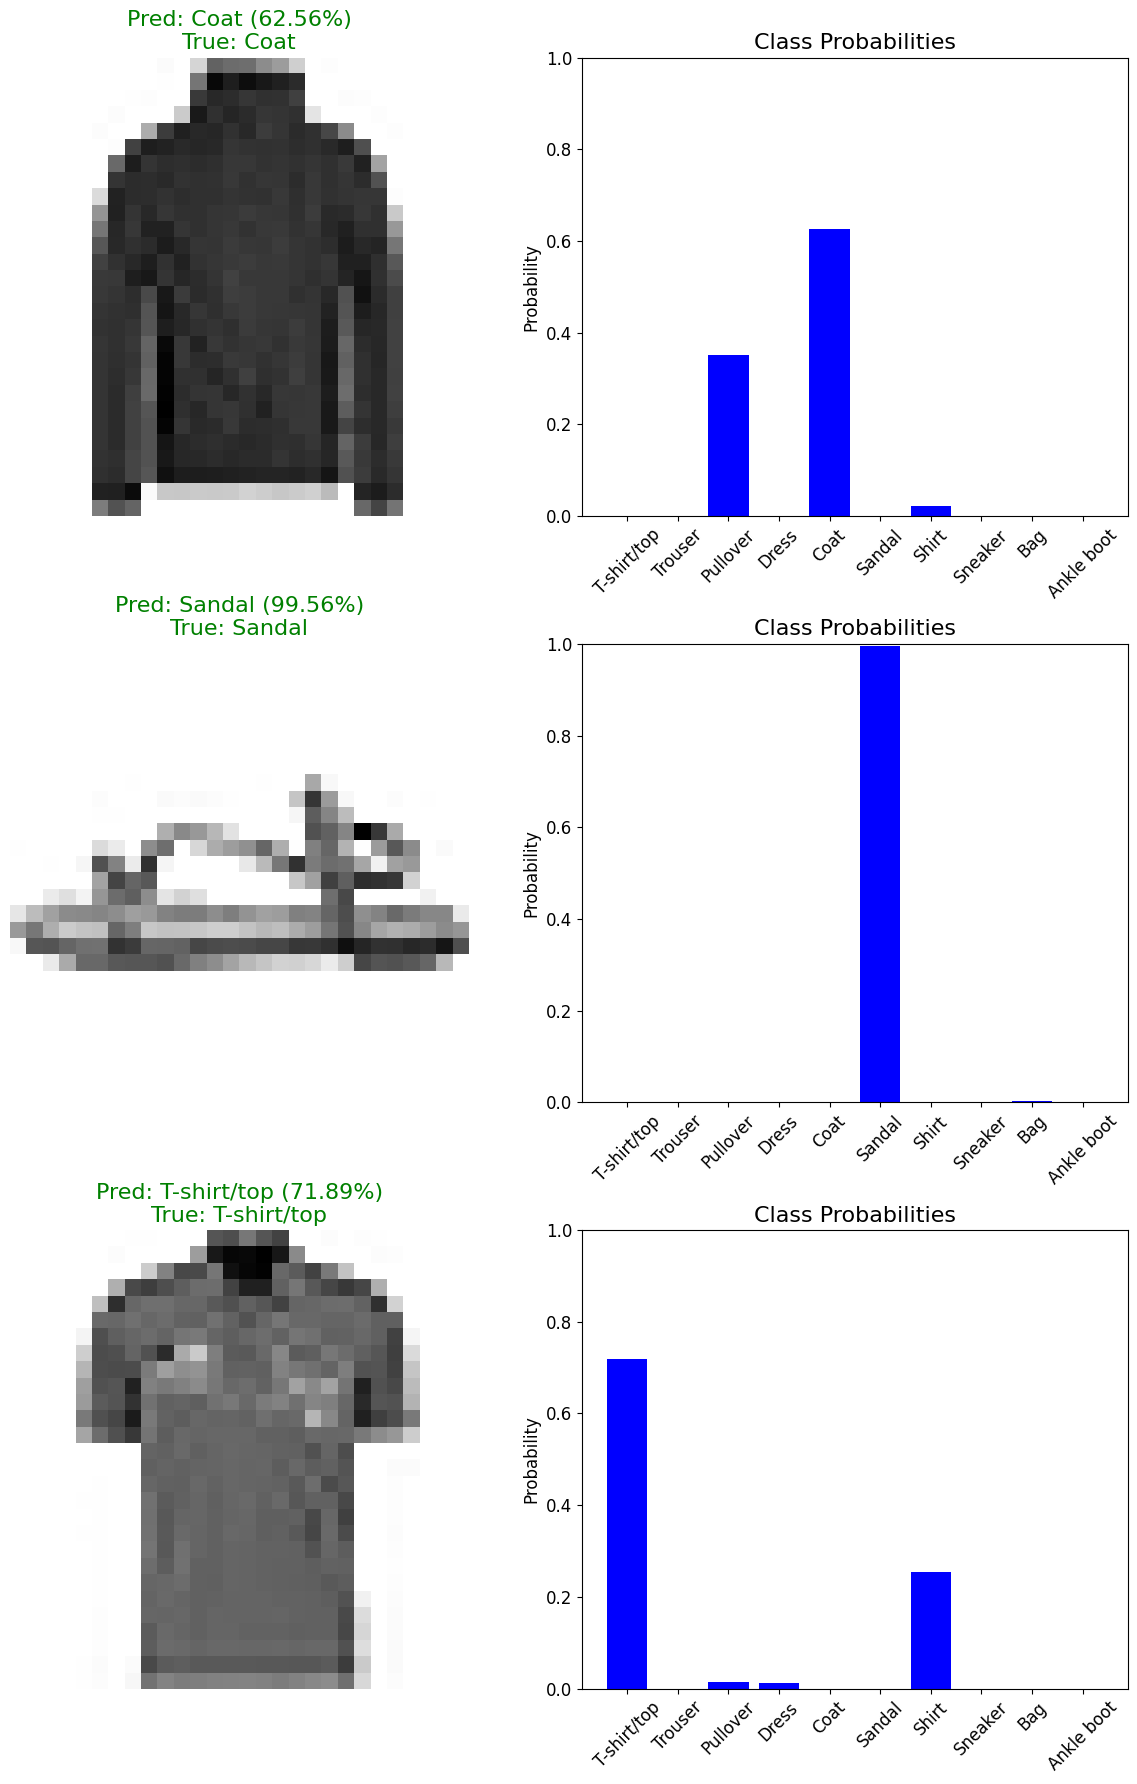

In [142]:
plot_random_image(model=model_5,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes= class_names,
                  batch_size=3,
                  save_images=False)